# 0 day

In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

jtplot.style(figsize=(15, 9))

In [80]:
class HomoSapiens:
    _STATUS = [
        'ALIVE',
        'DEAD'
    ]
    
    def __init__(self):
        self.coords = (np.random.randint(0, 101), np.random.randint(0, 101))
        self.health = 100
        self.current_status = self._STATUS[0]
    
    def get_position(self):
        return self.coords
    
    def set_position(self, new_coords):
        if self.am_i_alive():
            self.coords = new_coords
    
    def lost_health(self):
        self.health -= np.random.randint(0, 101)
        if self.health <= 0:
            self.current_status = self._STATUS[1]
    
    def am_i_alive(self)->bool:
        return self.current_status == self._STATUS[0]
    
#     def walking(self, velocity=1):
#         while self.am_i_alive():
#             new_coords = (np.round(self.get_position()[0] + np.random.choice([1, -1])*velocity, 2),
#                           np.round(self.get_position()[1] + np.random.choice([1, -1])*velocity, 2))
#             self.set_position(new_coords)
#             self.lost_health()


class Human(HomoSapiens):
    _STATE = {
        'Dead': 0.1,
        'Bitten': 0.3,
        'Lost Health': 0.3,
        'Nothing': 0.3
    }
    
    def __init__(self):
        super().__init__()
    
    def reborn_to_a_zombie(self):
        self.__class__ = Zombie


class Zombie(HomoSapiens):
    _STATE = {
        'Dead': 0.1,
        'Bit': 0.3,
        'Ate': 0.2,
        'Lost Health': 0.2,
        'Nothing': 0.2
    }
    
    def __init__(self):
        super().__init__()
        
        


In [81]:
h = Human()
print(h.current_status)
h.lost_health()
print(h.current_status)

ALIVE
ALIVE


In [82]:
h.health

91

In [34]:
class ZombieApocalypse():
    def __init__(self, humans=100, zombies=10):
        self.humans = self.create(Human, humans)
        self.zombies = self.create(Zombie, zombies)
        
    def create(self, class_name, amount):    
        return [class_name() for _ in range(amount)]  
    
    def show_info(self):
        print(f'HUMANS: {len(self.humans)}, ZOMBIES: {len(self.zombies)}')
    
    def visualize(self):
        h_coords = {'x': [], 'y': []}
        z_coords = {'x': [], 'y': []}
        
        for h, z in zip(self.humans, self.zombies):
            h_coords['x'].append(h.get_position()[0])
            h_coords['y'].append(h.get_position()[1])
            z_coords['x'].append(z.get_position()[0])
            z_coords['y'].append(z.get_position()[1])
        
        fig, ax = plt.subplots()
        ax.scatter(h_coords['x'], h_coords['y'], c='pink')
        ax.scatter(z_coords['x'], z_coords['y'], c='g')
        

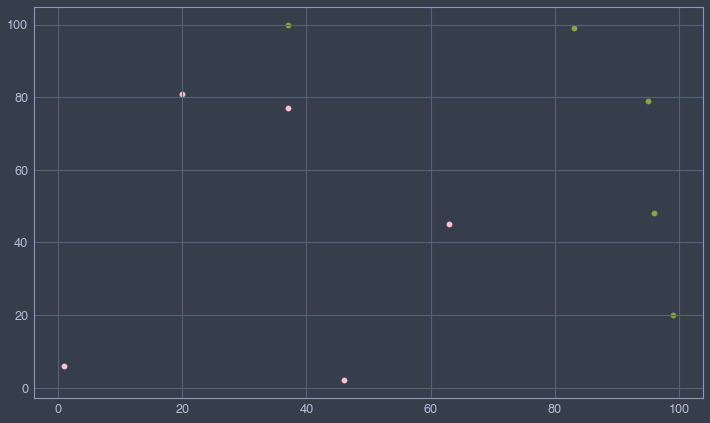

In [35]:
za = ZombieApocalypse(20, 5)
za.visualize()

In [21]:
h = Human()
z = Zombie()

h.get_position(), z.get_position()

((78, 15), (14, 90))

In [22]:
h.reborn_to_a_zombie()

In [23]:
h

In [24]:
z

In [25]:
humans = [Human() for i in range(10)]
zombies = [Zombie() for i in range(10)]

In [26]:
h_coords = {'x': [], 'y': []}
z_coords = {'x': [], 'y': []}
for h, z in zip(humans, zombies):
    h_coords['x'].append(h.get_position()[0])
    h_coords['y'].append(h.get_position()[1])
    z_coords['x'].append(z.get_position()[0])
    z_coords['y'].append(z.get_position()[1])

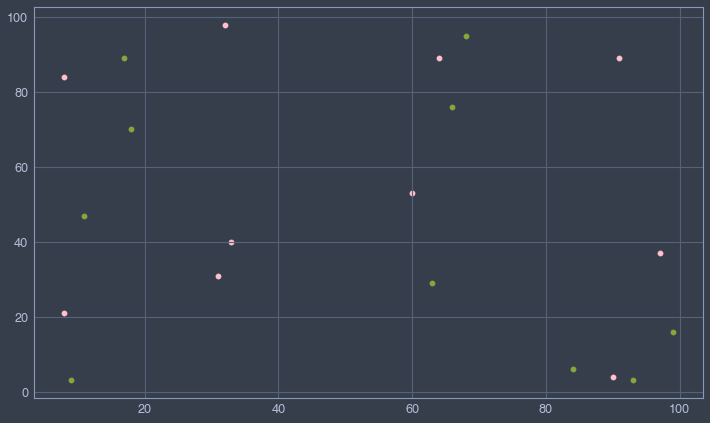

In [29]:
fig, ax = plt.subplots()
ax.scatter(h_coords['x'], h_coords['y'], c='pink')
ax.scatter(z_coords['x'], z_coords['y'], c='g')